# Guided Practice/Demo

The following code samples are provided directly from the lesson and should serve as a jumping off point for students to run the code on their own.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics

df = pd.DataFrame({'x': range(100), 'y': range(100)})
biased_df  = df.copy()
biased_df.loc[:20, 'x'] = 1
biased_df.loc[:20, 'y'] = 1

def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return series + jitter

df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)

## fit
lm = linear_model.LinearRegression().fit(df[['x']], df['y'])
print metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

## biased fit
lm = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

0.188341939681
0.193354999257


In [2]:
from sklearn import cross_validation
wd = '../../assets/dataset/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual

kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)
scores = []
rsquare = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    rsquare.append(metrics.r2_score(y.iloc[test_index],lm.predict(modeldata.iloc[test_index])))

print np.mean(scores)," This is the mean score of the generalized/K-Fold Model"
print np.mean(rsquare)," This is the mean r2 of the K-Fold Model"

# this score will be lower, but we're trading off bias error for generalized error
lm = linear_model.LinearRegression().fit(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata)),"This is the error for the model that takes everything"
print metrics.r2_score(y, lm.predict(modeldata))," This is the r2 for the model that takes everything"

1673.59841889  This is the mean score of the generalized/K-Fold Model
0.311952829899  This is the mean r2 of the K-Fold Model
1672.58110765 This is the error for the model that takes everything
0.311934605989  This is the r2 for the model that takes everything


In [3]:
#Now we're going to add more folds.
MoreK = cross_validation.KFold(len(modeldata), n_folds=1000, shuffle=True)
MoreKScores=[]
Morersquare = []
for train, test in MoreK:
    newLM = linear_model.LinearRegression().fit(modeldata.iloc[train],y.iloc[train])
    MoreKScores.append(metrics.mean_squared_error(y.iloc[test], lm.predict(modeldata.iloc[test])))
    Morersquare.append(metrics.r2_score(y.iloc[test_index],lm.predict(modeldata.iloc[test_index])))
print np.mean(MoreKScores)
print "The higher the number of folds, the more we genralize the set/worse fit"
print np.mean(Morersquare)," This is the mean r2 of the K-Fold Model with MORE Folds"

1672.41244094
The higher the number of folds, the more we genralize the set/worse fit
0.328218182973  This is the mean r2 of the K-Fold Model with MORE Folds


In [4]:
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=False)
scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    
print np.mean(scores)

1780.97924083


In [5]:
# Here we look at the error for a different number of folds
errorscore = []
foldnum = []
for fold in range(2,20):
    errorfold = cross_validation.KFold(len(modeldata), n_folds=fold, shuffle=True)
    foldnum.append(fold)
    folds=[]
    for train, test in errorfold:
        foldtest = linear_model.LinearRegression().fit(modeldata.iloc[train],y.iloc[train])
        folds.append(metrics.mean_squared_error(y.iloc[test], foldtest.predict(modeldata.iloc[test])))
    errorscore.append(np.mean(folds))

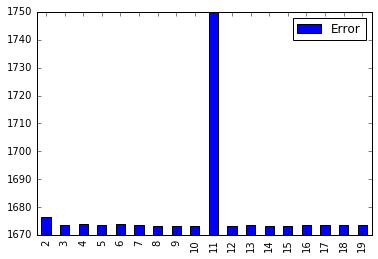

In [6]:
import matplotlib as plt
%matplotlib inline
errors = pd.DataFrame(errorscore, index=foldnum, columns=["Error"])
errors.plot(kind="bar", ylim=(1670,1750))

### This is where we stop

In [7]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata))
lm = linear_model.Lasso().fit(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata))
lm = linear_model.Ridge().fit(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata))

1672.58110765
1725.41581608
1672.60490113


In [8]:
alphas = np.logspace(-10, 10, 21)
print alphas

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01   1.00000000e+00   1.00000000e+01
   1.00000000e+02   1.00000000e+03   1.00000000e+04   1.00000000e+05
   1.00000000e+06   1.00000000e+07   1.00000000e+08   1.00000000e+09
   1.00000000e+10]


In [9]:
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print lm.coef_
    print metrics.mean_squared_error(y, lm.predict(modeldata))

Alpha: 1e-10
[ 112.68901765  -84.01121684  -24.68489063  -21.00314493  -21.71893628]
1672.58110765
Alpha: 1e-09
[ 112.68901765  -84.01121684  -24.6848906   -21.00314491  -21.71893626]
1672.58110765
Alpha: 1e-08
[ 112.68901765  -84.01121684  -24.6848904   -21.00314471  -21.71893606]
1672.58110765
Alpha: 1e-07
[ 112.68901763  -84.01121682  -24.68488837  -21.00314268  -21.71893403]
1672.58110765
Alpha: 1e-06
[ 112.68901745  -84.01121667  -24.68486804  -21.00312237  -21.71891373]
1672.58110765
Alpha: 1e-05
[ 112.68901562  -84.01121509  -24.68466472  -21.00291929  -21.71871079]
1672.58110765
Alpha: 0.0001
[ 112.68899732  -84.01119938  -24.68263174  -21.00088873  -21.71668161]
1672.58110765
Alpha: 0.001
[ 112.68881437  -84.01104228  -24.66232204  -20.98060316  -21.69640993]
1672.58110774
Alpha: 0.01
[ 112.68698753  -84.00947323  -24.46121539  -20.77973778  -21.49568404]
1672.58111645
Alpha: 0.1
[ 112.66896732  -83.99396383  -22.63109556  -18.95202277  -19.66942371]
1672.58185208
Alpha: 1.0
[

In [10]:
from sklearn import grid_search

In [11]:

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')

gs.fit(modeldata, y)

print -gs.best_score_ # mean squared error here comes in negative, so let's make it positive.
print gs.best_estimator_ # explains which grid_search setup worked best
print gs.grid_scores_ # shows all the grid pairings and their performances.

1814.09369133
Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
[mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-10}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1.0000000000000001e-09}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-07}, mean: -1817.58711, std: 542.14317, params: {'alpha': 1.0000000000000001e-05}, mean: -1817.58707, std: 542.14331, params: {'alpha': 0.0001}, mean: -1817.58663, std: 542.14477, params: {'alpha': 0.001}, mean: -1817.58230, std: 542.15933, params: {'alpha': 0.01}, mean: -1817.54318, std: 542.30102, params: {'alpha': 0.10000000000000001}, mean: -1817.20111, std: 543.63587, params: {'alpha': 1.0}, mean: -1814.09369, std: 556.35563, params: {'alpha': 10.0}, mean: -1818.51694, std: 653.68607, params: 

In [12]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
1.2 is better than 2.2
found better solution! using 1.2
0.2 is better than 1.2
found better solution! using 0.2
6.0 is closest to 6.2


In [13]:
lm = linear_model.SGDRegressor()
lm.fit(modeldata, y)
print lm.score(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata))

0.308491841083
1680.94993944


# Independent Practice

Use the following code to work through the problems given.

In [14]:
params = {} # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

BEST ESTIMATOR
1689.94986592
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
ALL ESTIMATORS
[mean: -1689.94987, std: 119.12368, params: {}]


In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [17]:
iris = datasets.load_iris()

In [22]:
irisdf = pd.DataFrame(iris.data, columns = iris.feature_names)
irisdf["target"] = iris.target
irisdf.columns

Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)', u'target'],
      dtype='object')

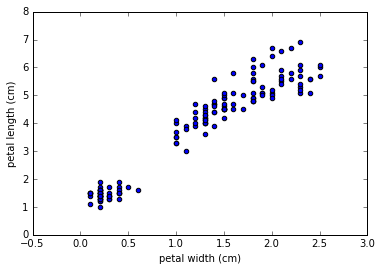

In [23]:
irisdf.plot(kind="scatter", x="petal width (cm)", y="petal length (cm)")